In [9]:
import FM_dataset
from lightfm.datasets import fetch_movielens
import lightfm as lf
import log as lg
import scipy.sparse as sparse
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
def fm_exe(ratings : sparse.coo_matrix, user_features : sparse.csr_matrix, music_features : sparse.csr_matrix)-> np.float32:
    user_l2 = 0.1
    music_l2 = 0.1
    logger = lg.init_logger()
    model = lf.LightFM(loss='warp', no_components=2, user_alpha=user_l2, item_alpha=music_l2)
    logger.info("start training")
    # 特徴量ナシならうまく分布する
    model.fit(ratings, user_features=user_features, item_features=music_features, epochs=30, num_threads=2)
    logger.info("finish training")
    item_biases, item_embeddings = model.get_item_representations(music_features)
    return item_biases, item_embeddings

# def sample_movie_lens():
#     movielens = fetch_movielens()
#     model = lf.LightFM(loss='warp', no_components=2, user_alpha=0.0001, item_alpha=0.0001)
#     model.fit(movielens['train'], epochs=30, num_threads=2)
#     item_biases, item_embeddings = model.get_item_representations(movielens['item_features'])
#     print(movielens['item_features'])
#     return item_biases, item_embeddings
    

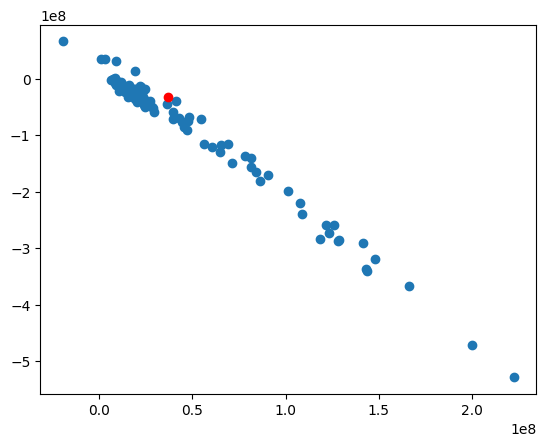

[ 7.4218915e+06  6.7325660e+06  1.0335100e+07  1.0203287e+07
  7.6429515e+06  7.8972570e+06  9.3738330e+06  1.0559943e+07
  8.9583290e+06  6.7633630e+06  1.0827519e+07  7.9620485e+06
  1.2327735e+07  8.0689590e+06  5.9455815e+06  9.8574920e+06
  8.6768710e+06  7.2225040e+06  9.1809860e+06  7.7931230e+06
  6.9896995e+06  8.3305170e+06  1.1804781e+07  1.1477868e+07
  6.3035640e+06  6.2847670e+06  1.3373370e+07  8.0657210e+06
  1.0896100e+07  1.2281580e+07  1.4629064e+06  9.3623730e+06
  6.7648925e+06  8.7595010e+06  7.7676880e+06  1.1918706e+07
  9.2835360e+06  6.5170485e+06  1.0582981e+07  1.0702820e+07
  1.0945318e+07  7.9619275e+06  9.1068680e+06  1.2797269e+07
  3.3367108e+06  7.6751350e+06  7.4733550e+06  1.0148684e+07
  1.1726805e+07  5.5460895e+06  6.3600735e+06  2.1676196e+07
  3.5045184e+07  5.4426180e+07  9.8736264e+07  1.5353922e+08
  6.0598620e+07  3.9416848e+07  4.4507872e+07  1.9460860e+07
  2.2606406e+07  2.7883624e+07  4.8270948e+07  3.7017480e+07
  1.7333265e+06  9.36109

In [11]:
if __name__ == "__main__":
    df_rating = pd.read_csv("./rating.csv", header=0)
    df_user = pd.read_csv("./user.csv", header=0)
    df_music = pd.read_csv("./music.csv", header=0)
    interaction, user_features, music_features = FM_dataset.df2dataset(df_rating, df_user, df_music)
    item_biases, item_embeddings = fm_exe(interaction, user_features, music_features)
    # item_biases, item_embeddings = sample_movie_lens()
    # add center point
    center = np.array([np.mean(item_embeddings[:,0]), np.median(item_embeddings[:,1])])
    # show item_embeddings in 2-Dvector space
    plt.scatter(item_embeddings[:,0], item_embeddings[:,1])
    plt.scatter(center[0], center[1], c='r')
    plt.show()
    print(item_biases)
    print(item_embeddings)